#Practica preparacion



Se estan realizndo proceso de limpieza de datos

In [186]:
#Importamos las librerías necesarias
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset
import io
import seaborn as sns
#Libreria para generar knn
from sklearn.impute import KNNImputer

In [187]:
Isalary = pd.read_csv('Datas\SalaryData.csv')

In [188]:
Isalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [189]:
def ValoresUnicos(columna):
    return Isalary[columna].unique()

for col in Isalary.columns:
    print(f"Unique values in column '{col}':{ValoresUnicos(col)}")


Unique values in column 'Age':[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan]
Unique values in column 'Gender':['Male' 'Female' nan]
Unique values in column 'Education Level':["Bachelor's" "Master's" 'PhD' nan]
Unique values in column 'Job Title':['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project En

In [190]:
na_values =('na.nan','NA','NaN','nan','inf')
Isalary = Isalary.replace(na_values,np.nan)

In [191]:
Isalary.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [192]:
Isalary.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [193]:
Isalary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Se identifica las cantidades de personas que estudiaron en diferentes niveles

In [194]:
value_counts = Isalary['Education Level'].value_counts()
count = value_counts["Bachelor's"]
print(count)


224


Identificar valores en la columna 'education level'

In [195]:
valores_unicos = Isalary['Education Level'].unique()  # Obtiene los valores únicos en la columna especificada
print(valores_unicos)  

["Bachelor's" "Master's" 'PhD' nan]


Se quitaran los valores nan utilizando la moda y la media para evitar que los datos se corrompan

In [196]:
#job title
moda_Education  = Isalary['Education Level'].mode()[0]
Isalary['Education Level'].fillna(moda_Education, inplace=True)
print(Isalary)


      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [197]:
#job title
moda_jtitle = Isalary['Job Title'].mode()[0]
Isalary['Job Title'].fillna(moda_jtitle, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

In [198]:
#Gender
moda_genero = Isalary['Gender'].mode()[0]
Isalary['Gender'].fillna(moda_genero, inplace=True)
print(Isalary)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

Para reemplazar los años nulos utlizremos KNN 

Primero generamos una data set de respaldo

In [199]:
Copia_Isalary = Isalary.copy()
Copia_Isalary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [200]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

Este código crea un objeto `knn_imputer` que utiliza el algoritmo K-Nearest Neighbors (KNN) para imputar valores faltantes en un conjunto de datos. El parámetro `n_neighbors` se establece en 2, lo que significa que el algoritmo KNN utilizará los 2 vecinos más cercanos para imputar los valores faltantes. El parámetro `weights` se establece en "uniform", lo que significa que todos los vecinos tienen el mismo peso en el cálculo de los valores imputados.

In [201]:
Copia_Isalary[['Salary','Years of Experience','Age']] = knn_imputer.fit_transform(Copia_Isalary[['Salary','Years of Experience','Age']])
Copia_Isalary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


Se identificaran los 5 trabajos que mas se repiten dentro de los datos a analizar 

In [202]:
top_5_frecuencias = Isalary['Job Title'].value_counts().head()

print(top_5_frecuencias)

Job Title
Director of Marketing       14
Director of Operations      11
Senior Business Analyst     10
Senior Marketing Analyst     9
Senior Marketing Manager     9
Name: count, dtype: int64


Se detectaron 3 tipos de datos de tipo object, los cuales no permiten realizar los modelos esperados por lo cual se relizara trasformacion del tipo de dato y si es el caso exclusion del dato.

Se realiza one hot encoding para los datos de 'gender'

In [203]:
df1 = Copia_Isalary

one_hot = pd.get_dummies(df1['Gender'])
df = pd.concat([df1, one_hot], axis=1)
df4 = df.drop('Gender', axis=1)
print(df4)

      Age Education Level                      Job Title  Years of Experience  \
0    32.0      Bachelor's              Software Engineer                  5.0   
1    28.0        Master's                   Data Analyst                  3.0   
2    45.0             PhD                 Senior Manager                 15.0   
3    36.0      Bachelor's                Sales Associate                  7.0   
4    52.0        Master's                       Director                 20.0   
..    ...             ...                            ...                  ...   
370  35.0      Bachelor's       Senior Marketing Analyst                  8.0   
371  43.0        Master's         Director of Operations                 19.0   
372  29.0      Bachelor's         Junior Project Manager                  2.0   
373  34.0      Bachelor's  Senior Operations Coordinator                  7.0   
374  44.0             PhD        Senior Business Analyst                 15.0   

       Salary  Female   Mal

Para 'Education level' se utlizara level encoding debido a que los datos de nivel educacional poseen un orden jerarquico donde:
Bachelor's = 0
Master´s = 1
PhD = 2

In [204]:
# Creamos un diccionario de datos que asocia las categorías con sus valores codificados correspondientes
codificacion = {"Bachelor's": 0, 'PhD': 1, "Master's": 2}

# Codificamos la columna "tamaño" utilizando el diccionario de datos
df4['educ_codificado'] = df4['Education Level'].map(codificacion)

# Imprimimos el DataFrame actualizado
df4.drop('Education Level', axis=1, inplace=True)
df4.head(5)

,Age,Job Title,Years of Experience,Salary,Female,Male,educ_codificado
0,32.0,Software Engineer,5.0,90000.0,False,True,0
1,28.0,Data Analyst,3.0,65000.0,True,False,2
2,45.0,Senior Manager,15.0,150000.0,False,True,1
3,36.0,Sales Associate,7.0,60000.0,True,False,0
4,52.0,Director,20.0,200000.0,False,True,2


Y para 'job title' se utilizara one hot encoding

In [205]:

one_hot = pd.get_dummies(df4['Job Title'])
df4 = pd.concat([df4, one_hot], axis=1)
df6 = df4.drop('Job Title', axis=1)
print(df6)

      Age  Years of Experience    Salary  Female   Male  educ_codificado  \
0    32.0                  5.0   90000.0   False   True                0   
1    28.0                  3.0   65000.0    True  False                2   
2    45.0                 15.0  150000.0   False   True                1   
3    36.0                  7.0   60000.0    True  False                0   
4    52.0                 20.0  200000.0   False   True                2   
..    ...                  ...       ...     ...    ...              ...   
370  35.0                  8.0   85000.0    True  False                0   
371  43.0                 19.0  170000.0   False   True                2   
372  29.0                  2.0   40000.0    True  False                0   
373  34.0                  7.0   90000.0   False   True                0   
374  44.0                 15.0  150000.0    True  False                1   

     Account Manager  Accountant  Administrative Assistant  Business Analyst  \
0      

Validacion de limpieza y transformcion

In [206]:
df6.isna().sum()

Age                    0
Years of Experience    0
Salary                 0
Female                 0
Male                   0
                      ..
UX Designer            0
UX Researcher          0
VP of Finance          0
VP of Operations       0
Web Developer          0
Length: 180, dtype: int64

Se evaluaran las extraxiones de outliers utlilizando los graficos de boxplot

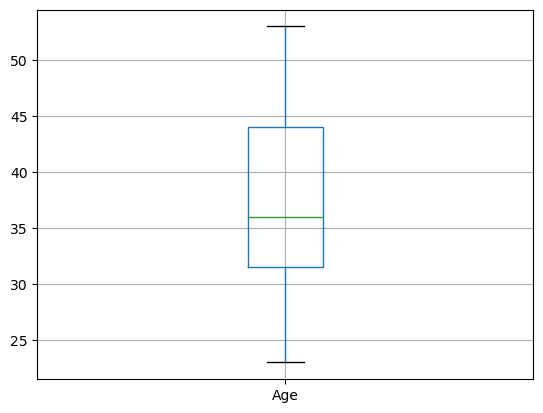

In [207]:
#Age
df4.boxplot(column=['Age'])
plt.show()

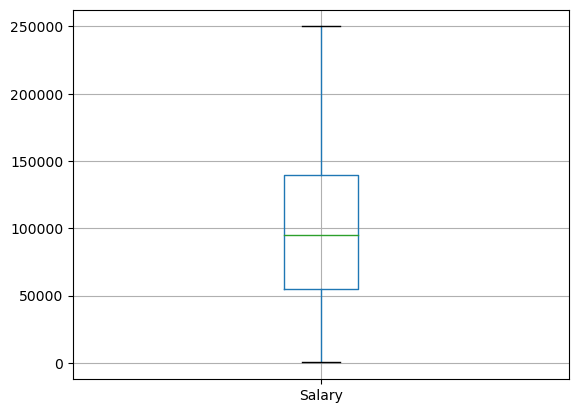

In [208]:
#Salary
df4.boxplot(column=['Salary'])
plt.show()

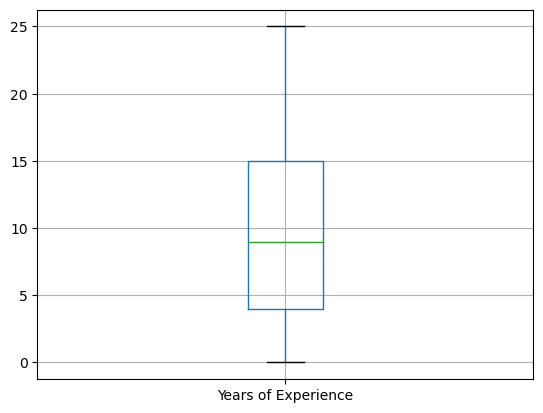

In [209]:
#Years experience
df4.boxplot(column=['Years of Experience'])
plt.show()

NORMALISACION DE DATOS

Importacion de librerias para realizar normalizacion

In [210]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [211]:
Salario_normalizado = scaler.fit_transform(df4[['Salary']])
df4['Salary'] = Salario_normalizado

In [212]:
def Normalizar(columna):
    nomalizada = scaler.fit_transform(df4[[f'{columna}']])
    df4[f'{columna}'] = nomalizada

Tras el analisis de estos tres datos a travez de los diagrama de cajas se determino que no existen outliers en la datos que se estan trabajando

Se evaluaran las correlaciones entro los datos del data

In [213]:

corr_matrix = df6.corr()
corr_matrix["Salary"].sort_values(ascending=False)

Salary                                   1.000000
Years of Experience                      0.930338
Age                                      0.922335
educ_codificado                          0.555121
Director of Marketing                    0.264388
                                           ...   
Junior Sales Representative             -0.130915
Junior Financial Analyst                -0.136982
Junior Marketing Coordinator            -0.143078
Junior Business Analyst                 -0.155419
Junior Business Development Associate   -0.171839
Name: Salary, Length: 180, dtype: float64

Ahora se desplegara un mapa de calor para entregar otra forma de presentar las correlaciones

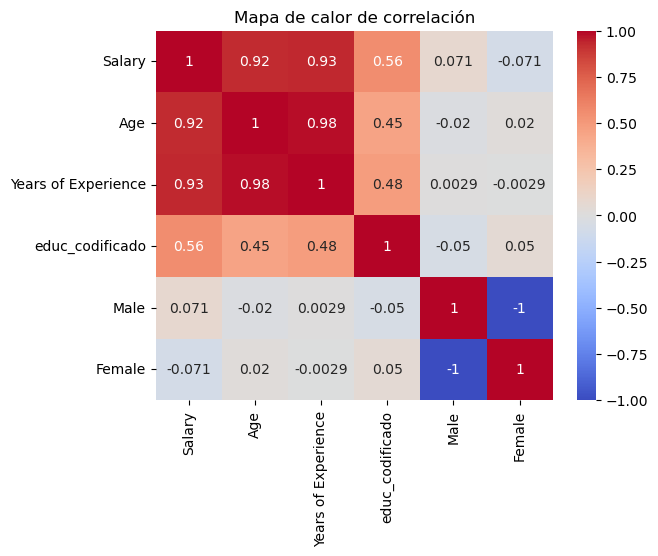

In [214]:
subset = df6[['Salary','Age','Years of Experience','educ_codificado','Male','Female']]
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


Grafico de barras donde la variable independiente es la edas(years) y la dependiente el sueldo(salary)

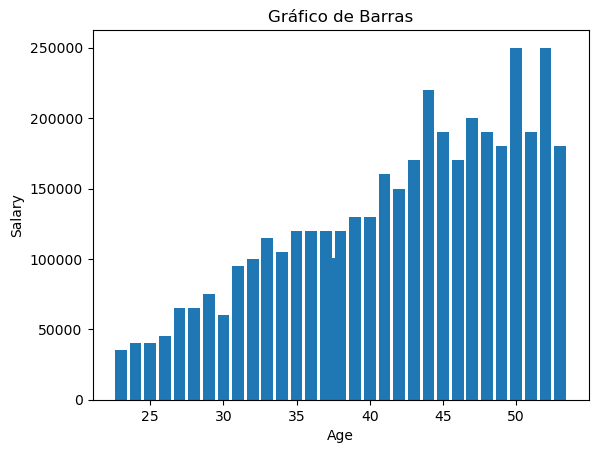

In [215]:
plt.bar(df6['Age'],df6['Salary'] )
plt.title('Gráfico de Barras')
plt.ylabel('Salary')
plt.xlabel('Age')
plt.show()

Como se visualizo anteriormente en el mapa de calor, la tendencia indica y la correlacion positiva indica que mientras mas años tengan los trabajadores(Age) su salario(salary) aumenta.

Grafico de barras donde la variable  dependiente (y) es salary y la independiente (x) años de experiencia



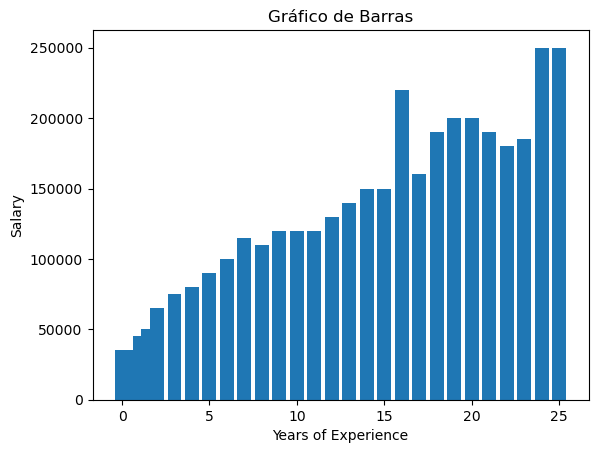

In [216]:
plt.bar(df6['Years of Experience'],df6['Salary'] )
plt.title('Gráfico de Barras')
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.show()

Del grafico anterior se puede inferir que los años de experiencia en el area siguen la misma tendencia que la edad de los trabajadores

grafico de dispersion para el salario de un director de marketing a travez de los años de experiencia


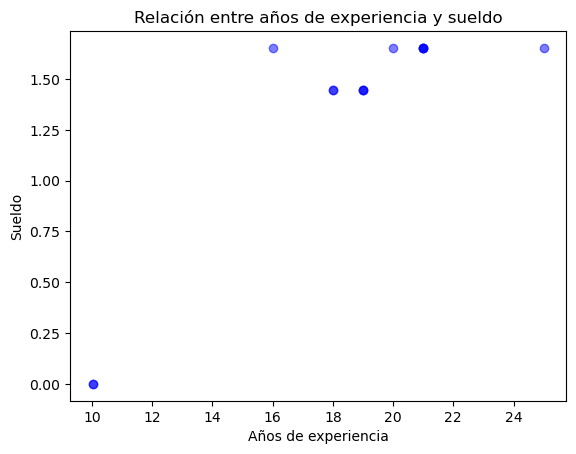

In [217]:

puesto_especifico = 'Director of Marketing'
df_filtrado = df4[df4['Job Title'] == puesto_especifico]

plt.scatter(df_filtrado['Years of Experience'], df_filtrado['Salary'], c='blue', alpha=0.5)


plt.xlabel('Años de experiencia')
plt.ylabel('Sueldo')
plt.title('Relación entre años de experiencia y sueldo')


plt.show()

Grafico barras de sueldo (y) por Education level

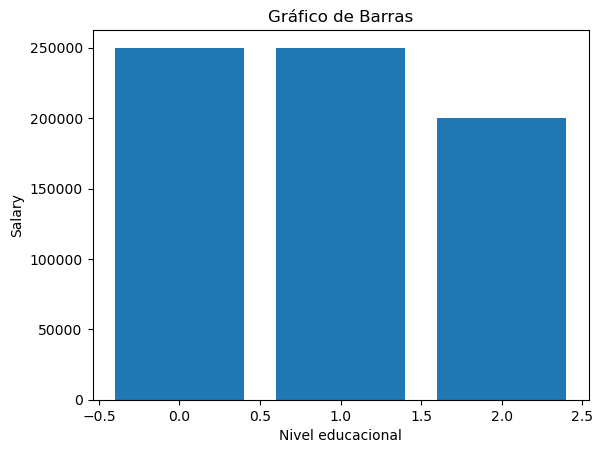

In [218]:
plt.bar(df6['educ_codificado'],df6['Salary'] )
plt.title('Gráfico de Barras')
plt.ylabel('Salary')
plt.xlabel('Nivel educacional')
plt.show()

# Modelo de clasificacion

In [219]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split #permkte realizar divicion entre test
from sklearn.linear_model import LinearRegression #para regresion linela
from sklearn.svm import SVR #subvector regtecion
from sklearn.tree import DecisionTreeRegressor, plot_tree #para un dibujo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #error absoluto medio,cuadratico medio y score

Ajustar datos

In [220]:
df7 = df6

In [221]:
#datos_columna = df7['Salary'].values.reshape(-1, 1)
#datos_columna = df7['Salary'].to_frame()
#datos_columna = df7.assign(new_salary=df7['Salary'])
import pandas as pd
import numpy as np
columna = ['Age','Years of Experience','educ_codificado']
matriz_X= df7[columna].to_numpy()


In [222]:
#datos_columna = df7['Age'].values.reshape(-1, 1)
#datos_columna = df7['Age'].to_frame()
#datos_columna = df7.assign(new_Age=df7['Age'])
columna = df7['Salary']
matriz_y=columna.values.reshape(-1,1)

Se divide la data entre train  y test

In [223]:
X = matriz_X
y = matriz_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [224]:
#Crea Modelos
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [225]:
# Entrena Modelos con la data de Train
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

# Plot Árbol de Decisión
#plot_tree(dtr)

c:\Users\alej1\.conda\envs\ETL\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alej1\AppData\Local\Temp\ipykernel_24008\3994395670.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor()

In [226]:
models = [lr, svr, dtr, rfr]
for model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}')

LinearRegression: MAE=11645.52, MSE=263296990.05, R2=0.88
SVR: MAE=39444.88, MSE=2322702864.32, R2=-0.04
DecisionTreeRegressor: MAE=10540.48, MSE=244214329.18, R2=0.89
RandomForestRegressor: MAE=9925.98, MSE=236436468.90, R2=0.89


In [228]:
%pip install -q gradio
import gradio as gr 
import requests

^C
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'gradio'

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
def predict(Age:float,
            anos_experiencia:float,
            nivel_educacional:int):
    input_df7=[[Age,
                anos_experiencia,
                nivel_educacional]]
    prediction= lr.predict(input_df7)[0] #Acá se coloca el mejor modelo seleccionado
    return prediction

inputs=[gr.inputs.Slider(minimum=0,maximum=90,label="Edad"),
        gr.inputs.Slider(minimum=0,maximum=90,label="años experiencia"),
        gr.inputs.Slider(minimum=0,maximum=3,label="Tipo educacion 1:bachillerato - 2:master - 3:phd")]

output=gr.outputs.Textbox(label="Predice el sueldo por edad,nivel educativo y años experiencia")

gr.Interface(fn=predict,
             inputs=inputs,
             outputs=output).launch(debug=True,share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7fff2179d7e4967065.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
